In [ ]:
!pip install ujson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.7 MB/s eta 0:00:00


In [ ]:
%env JOBLIB_TEMP_FOLDER=/tmp
!pip install pyspark

env: JOBLIB_TEMP_FOLDER=/tmp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=d30251e86b053fa4b28b319cb3d87ca9164c132d8bd4b5d37f1f0fc7b4b86403
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


# Installing All the necessary Dependency

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 8)
import os
import gc
#import ujson as json
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
import seaborn as sns

import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot

init_notebook_mode(connected=True)

import altair as alt
from altair.vega import v5
from IPython.display import HTML
#alt.renderers.enable('notebook')

from IPython.display import HTML
from IPython.display import Image
from IPython.display import display
from IPython.core.display import display
from IPython.core.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]
%config InlineBackend.figure_format = 'svg'
th_props = [('font-size', '13px'), ('background-color', 'white'), ('color', '#666666')]
td_props = [('font-size', '15px'), ('background-color', 'white')]
styles = [dict(selector="td", props=td_props), dict(selector="th", props=th_props)]

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

/usr/local/lib/python3.10/dist-packages/altair/vega/v5/__init__.py:18: AltairDeprecationWarning:

The module altair.vega.v5 is deprecated and will be removed in Altair 5.



In [ ]:
# using ideas from this kernel: https://www.kaggle.com/notslush/altair-visualization-2018-stackoverflow-survey
def prepare_altair():
    """
    Helper function to prepare altair for working.
    """

    vega_url = 'https://cdn.jsdelivr.net/npm/vega@' + v5.SCHEMA_VERSION
    vega_lib_url = 'https://cdn.jsdelivr.net/npm/vega-lib'
    vega_lite_url = 'https://cdn.jsdelivr.net/npm/vega-lite@' + alt.SCHEMA_VERSION
    vega_embed_url = 'https://cdn.jsdelivr.net/npm/vega-embed@3'
    noext = "?noext"

    paths = {
        'vega': vega_url + noext,
        'vega-lib': vega_lib_url + noext,
        'vega-lite': vega_lite_url + noext,
        'vega-embed': vega_embed_url + noext
    }

    workaround = f"""    requirejs.config({{
        baseUrl: 'https://cdn.jsdelivr.net/npm/',
        paths: {paths}
    }});
    """

    return workaround

def add_autoincrement(render_func):
    # Keep track of unique <div/> IDs
    cache = {}
    def wrapped(chart, id="vega-chart", autoincrement=True):
        if autoincrement:
            if id in cache:
                counter = 1 + cache[id]
                cache[id] = counter
            else:
                cache[id] = 0
            actual_id = id if cache[id] == 0 else id + '-' + str(cache[id])
        else:
            if id not in cache:
                cache[id] = 0
            actual_id = id
        return render_func(chart, id=actual_id)
    # Cache will stay outside and
    return wrapped

@add_autoincrement
def render(chart, id="vega-chart"):
    """
    Helper function to plot altair visualizations.
    """
    chart_str = """
    <div id="{id}"></div><script>
    require(["vega-embed"], function(vg_embed) {{
        const spec = {chart};
        vg_embed("#{id}", spec, {{defaultStyle: true}}).catch(console.warn);
        console.log("anything?");
    }});
    console.log("really...anything?");
    </script>
    """
    return HTML(
        chart_str.format(
            id=id,
            chart=json.dumps(chart) if isinstance(chart, dict) else chart.to_json(indent=None)
        )
    )

# setting up altair
workaround = prepare_altair()
HTML("".join((
    "<script>",
    workaround,
    "</script>",
)))

It's time to take a look in all files provided by the dataset.

# Loading Data Into Collab

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/'COMPSCI 532'/Project/

Mounted at /gdrive
/gdrive/MyDrive/COMPSCI 532/Project


In [ ]:
%ls

'archive (1).zip'           'Missing Values count.jpeg'
 data/                      'Missing values.jpeg'
 histogram.png              'pie chat.jpeg'
 hs_err_pid1064.log         'relase stats .png'
 links_missing.csv          'releasegraph .png'
'links missing values.png'  'user_stats .png'
 metadata_missing.csv       'user word cloud .jpeg'
'metadata missng.png'       'word cluld .jpeg'


In [ ]:
DATA_PATH = './data/'

In [ ]:
print('Data Files in Directory')
print(os.listdir(DATA_PATH))

Data Files in Directory
['credits.csv', 'movies_metadata.csv', 'links_small.csv', 'keywords.csv', 'links.csv', 'ratings.csv', 'ratings_small.csv']


# Data Pre-Processing

In [ ]:

import pyspark
import pyspark.sql.functions as sql_func
from pyspark.sql.types import *
from pyspark.ml.recommendation import ALS, ALSModel
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.mllib.evaluation import RegressionMetrics, RankingMetrics
from pyspark.ml.evaluation import RegressionEvaluator

sc = SparkContext('local')
spark = SparkSession(sc)

In [ ]:
ratings = pd.read_csv(DATA_PATH+'ratings.csv')
links = pd.read_csv(DATA_PATH+'links.csv')
metadata = pd.read_csv(DATA_PATH+'movies_metadata.csv')

In [ ]:
credits = pd.read_csv(DATA_PATH+'credits.csv')
keywords = pd.read_csv(DATA_PATH+'keywords.csv')

In [ ]:
# Function that I wrote to print all relevant infos in dataset
import io

def get_df_info(df, name='ratings'):
    display(df.head(3))
    buf = io.StringIO()
    df.info(buf=buf)
    info = buf.getvalue().split('\n')[-2]
    display(f'Number of Rows: {df.shape[0]}, Number of Columns: {df.shape[1]}')
    display('Data Types')
    df_types = df.dtypes
    df_types = pd.DataFrame({'Column':df_types.index, 'Type':df_types.values})
    display(df_types)
    display(info)
    missing = df.isnull().sum().sort_values(ascending=False)
    display('Missing Values')
    if missing.values.sum() == 0:
        display('No Missing Values')
    else:
        missing = missing[missing > 0]
        missing = pd.DataFrame({'Column' : missing.index, 'Missing Values' : missing.values})
        missing.to_csv(f'{name}_missing.csv', sep='\t')
        display(missing)

<a id='bkground'></a>
<div class="h3"><center>Ratings Content</center></div>

In [ ]:
data_schema = StructType([
    StructField('movieId', IntegerType(), False),
    StructField('imdbId', IntegerType(), False),
    StructField('tmdbId', IntegerType(), False)
])

final_stat = spark.read.csv(
    DATA_PATH + 'links.csv', header=True, schema=data_schema
)

links1 = (final_stat.select(
    'movieId',
    'imdbId',
    'tmdbId'
))

In [ ]:
from pyspark.sql.functions import col

In [ ]:
links1.filter("tmdbId is null").show()

+-------+------+------+
|movieId|imdbId|tmdbId|
+-------+------+------+
|    142| 94878|  null|
|    604|115978|  null|
|    720|118114|  null|
|    721|114103|  null|
|    730|125877|  null|
|    769|116992|  null|
|    770| 38426|  null|
|    791|113610|  null|
|    821|112746|  null|
|    859|116536|  null|
|   1107|102336|  null|
|   1122|114147|  null|
|   1133|111357|  null|
|   1141|113328|  null|
|   1142|116403|  null|
|   1155| 92281|  null|
|   1166|113031|  null|
|   1316|115548|  null|
|   1421|113212|  null|
|   1434|123281|  null|
+-------+------+------+
only showing top 20 rows



In [ ]:
links1.filter("tmdbId is null").count()

219

In [ ]:
get_df_info(ratings, name='ratings')

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523


'Number of Rows: 26024289, Number of Columns: 4'

'Data Types'

,Column,Type
0,userId,int64
1,movieId,int64
2,rating,float64
3,timestamp,int64


'memory usage: 794.2 MB'

'Missing Values'

'No Missing Values'

<a id='bkground'></a>
<div class="h3"><center>Links Content</center></div>

In [ ]:
get_df_info(links, 'links')

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


'Number of Rows: 45843, Number of Columns: 3'

'Data Types'

,Column,Type
0,movieId,int64
1,imdbId,int64
2,tmdbId,float64


'memory usage: 1.0 MB'

'Missing Values'

,Column,Missing Values
0,tmdbId,219


<a id='bkground'></a>
<div class="h3"><center>Metadata Content</center></div>

In [ ]:
get_df_info(metadata, 'metadata')

,adult,belongs_to_collection,budget,genres,...,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",...,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",...,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",...,Grumpier Old Men,False,6.5,92.0


'Number of Rows: 45466, Number of Columns: 24'

'Data Types'

,Column,Type
0,adult,object
1,belongs_to_collection,object
2,budget,object
3,genres,object
4,homepage,object
5,id,object
6,imdb_id,object
7,original_language,object
8,original_title,object
9,overview,object


'memory usage: 8.3+ MB'

'Missing Values'

,Column,Missing Values
0,belongs_to_collection,40972
1,homepage,37684
2,tagline,25054
3,overview,954
4,poster_path,386
5,runtime,263
6,status,87
7,release_date,87
8,imdb_id,17
9,original_language,11


In [ ]:
get_df_info(credits, 'credits')

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602


'Number of Rows: 45476, Number of Columns: 3'

'Data Types'

,Column,Type
0,cast,object
1,crew,object
2,id,int64


'memory usage: 1.0+ MB'

'Missing Values'

'No Missing Values'

In [ ]:
get_df_info(keywords, 'keywords')

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


'Number of Rows: 46419, Number of Columns: 2'

'Data Types'

,Column,Type
0,id,int64
1,keywords,object


'memory usage: 725.4+ KB'

'Missing Values'

'No Missing Values'

In all the data info displayed, we can see that only ratings have a large memory usage, and I will use this dataset to make the recommendation system based on user ratings, the dataset have the relevant data like userId, movieId and ratings.<br>
It's important to say that the ratings dataset doesn't have any missing value, therefore, will not needed any treatment like data imputation or drop NA rows.<br>
The other datasets will be used for Exploratory Data Analysis.


<br>
<a id='bkground'></a>
<div class="h2"><center>Exploratory Data Analysis</center></div>
<br>

<div class="h3">Let's start with the following approaches</div><br>
* Rating Frequency.
* Analysis of most rated movies.
* World cloud with most common words.

Let's start plotting an Histogram to see the rating distribution.

In [ ]:
np.arange(0.5, 5.5, 0.5)

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [ ]:
ratings['rating'][:10]

0    1.0
1    4.5
2    5.0
3    5.0
4    5.0
5    4.0
6    4.5
7    5.0
8    4.0
9    4.0
Name: rating, dtype: float64

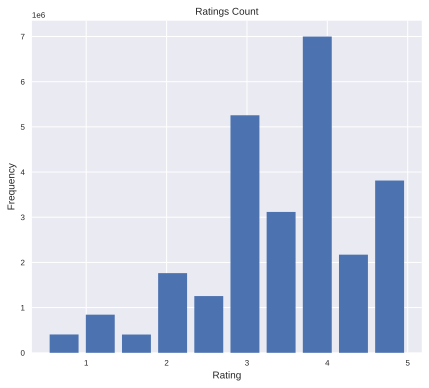

In [ ]:
plt.rcParams['figure.figsize'] = (7, 6)
plt.hist(ratings['rating'], bins=10, rwidth=0.8)
plt.title('Ratings Count', size=10)
# plt.xticks(ticks=np.arange(0.75, 5.75, 0.5), labels=np.arange(0.5, 5.5, 0.5))
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show();

In [ ]:
from collections import Counter

In [ ]:
rating_freq = Counter(ratings['rating'])

In [ ]:
a = sorted(rating_freq.items(), key=lambda x: x[0])

In [ ]:
a

[(0.5, 404897),
 (1.0, 843310),
 (1.5, 403607),
 (2.0, 1762440),
 (2.5, 1255358),
 (3.0, 5256722),
 (3.5, 3116213),
 (4.0, 6998802),
 (4.5, 2170441),
 (5.0, 3812499)]

Text(0.5, 1.0, 'Ratings Count')

<BarContainer object of 10 artists>

([<matplotlib.axis.XTick at 0x7fbea166f7c0>,
 [Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0')])

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Frequency')

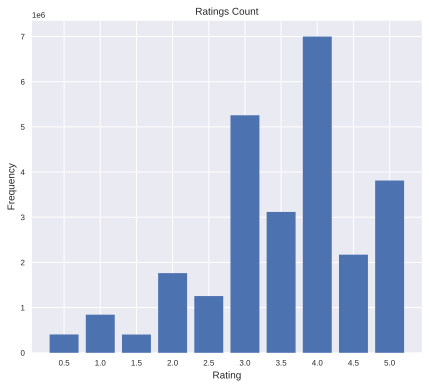

In [ ]:
plt.rcParams['figure.figsize'] = (7, 6)
plt.title('Ratings Count', size=10)
plt.bar([i[0] for i in a], [i[1] for i in a], width=0.4)
plt.xticks(ticks=np.arange(0.5, 5.5, 0.5), labels=np.arange(0.5, 5.5, 0.5))
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Ratings Count')

([<matplotlib.patches.Wedge at 0x7fbea07a8dc0>,
 [Text(1.0986862662609036, 0.05374465861530147, '0.5'),
  Text(1.078169518944822, 0.2180607447898207, '1.0'),
  Text(1.0332783309124272, 0.37727429128795514, '1.5'),
  Text(0.9006260620754708, 0.6315636914123789, '2.0'),
  Text(0.6164963175979364, 0.9110061966793555, '2.5'),
  Text(-0.20903327035493638, 1.079956060163894, '3.0'),
  Text(-1.0260201199295191, 0.396588846918084, '3.5'),
  Text(-0.7241452002900853, -0.828017952037776, '4.0'),
  Text(0.4164909239442874, -1.0181037816804503, '4.5'),
  Text(0.9855425424982136, -0.488575374866721, '5.0')],
 [Text(0.5992834179604928, 0.02931526833561898, '1.6%'),
  Text(0.5880924648789937, 0.11894222443081129, '3.2%'),
  Text(0.5636063623158692, 0.20578597706615734, '1.6%'),
  Text(0.4912505793138931, 0.3444892862249339, '6.8%'),
  Text(0.3362707186897835, 0.496912470916012, '4.8%'),
  Text(-0.1140181474663289, 0.5890669419075785, '20.2%'),
  Text(-0.559647338143374, 0.2163211892280458, '12.0%'),


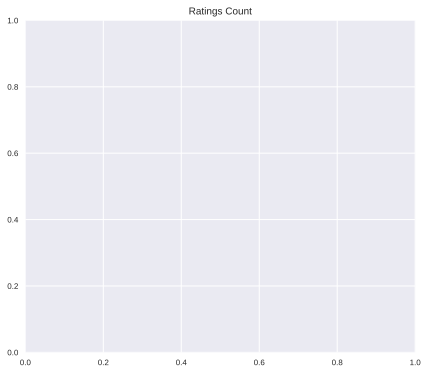

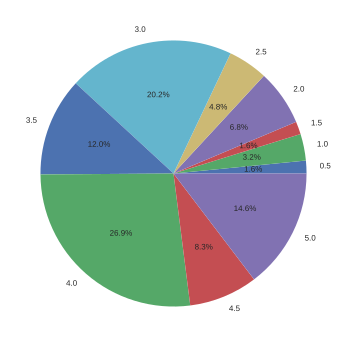

In [ ]:
plt.rcParams['figure.figsize'] = (7, 6)
plt.title('Ratings Count', size=10)
fig, ax = plt.subplots()
ax.pie([i[1] for i in a], labels=[i[0] for i in a], autopct='%1.1f%%')
# plt.xlabel('Rating')
# plt.ylabel('Frequency')
# plt.show()

And for a better visualization, let's represent by a pie chart with the percent representation.

We can see most movies were rated with 4, on a scale of 1 to 5. A fewer movies (compared to the total dataset) were rated with low grades. <br>
Let's see which movies were rated most times, taking the 10 most rated.

In [ ]:
df_aux = ratings['movieId'].value_counts().reset_index().head(10).rename(columns={'index': 'movieId', 'movieId': 'count'})
df_aux['movieId'] = df_aux['movieId'].astype(str)
df_aux

,movieId,count
0,356,91921
1,318,91082
2,296,87901
3,593,84078
4,2571,77960
5,260,77045
6,480,74355
7,527,67662
8,110,66512
9,1,66008


In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [ ]:
df_aux1 = ratings['userId'].value_counts().reset_index().head(10).rename(columns={'index': 'userId', 'userId': 'count'})
df_aux1['userId'] = df_aux1['userId'].astype(str)
df_aux1

,userId,count
0,45811,18276
1,8659,9279
2,270123,7638
3,179792,7515
4,228291,7410
5,243443,6320
6,98415,6094
7,229879,6024
8,98787,5814
9,172224,5701


In [ ]:
render(alt.Chart(df_aux).mark_bar().encode(
    x=alt.X('movieId:N', axis=alt.Axis(title='Movie ID'), sort=list(df_aux['movieId'].values)),
    y=alt.Y('count:Q', axis=alt.Axis(title='Total Count')),
    tooltip=['movieId', 'count']
).properties(title='Movie Count', height=300, width=800).interactive())

Time to discover which movies have this IDs.<br>
Let's check the IDs on IMDB and get some info.

In [ ]:
# Get the Movie on metadata
def get_movie_metadata(movieId):
    metadata['imdb_id'] = metadata['imdb_id'].astype('category')
    imdb_id = links[links['movieId'] == movieId]
    imdb_id = imdb_id.imdbId.values[0]
    if len(str(imdb_id)) == 7:
        movie_rated = metadata[metadata['imdb_id'] == 'tt'+imdb_id.astype(str)]
        df = movie_rated.loc[:,['title', 'overview', 'vote_average', 'release_date']]
        return df.reset_index(drop=True)
    elif len(str(imdb_id)) == 6:
        movie_rated = metadata[metadata['imdb_id'] == 'tt0'+imdb_id.astype(str)]
        df = movie_rated.loc[:,['title', 'overview', 'vote_average', 'release_date']]
        return df.reset_index(drop=True)
    elif len(str(imdb_id)) == 5:
        movie_rated = metadata[metadata['imdb_id'] == 'tt00'+imdb_id.astype(str)]
        df = movie_rated.loc[:,['title', 'overview', 'vote_average', 'release_date']]
        return df.reset_index(drop=True)
    elif len(str(imdb_id)) == 4:
        movie_rated = metadata[metadata['imdb_id'] == 'tt000'+imdb_id.astype(str)]
        df = movie_rated.loc[:,['title', 'overview', 'vote_average', 'release_date']]
        return df.reset_index(drop=True)
    elif len(str(imdb_id)) == 3:
        movie_rated = metadata[metadata['imdb_id'] == 'tt0000'+imdb_id.astype(str)]
        df = movie_rated.loc[:,['title', 'overview', 'vote_average', 'release_date']]
        return df.reset_index(drop=True)
    elif len(str(imdb_id)) == 2:
        movie_rated = metadata[metadata['imdb_id'] == 'tt00000'+imdb_id.astype(str)]
        df = movie_rated.loc[:,['title', 'overview', 'vote_average', 'release_date']]
        return df.reset_index(drop=True)
    elif len(str(imdb_id)) == 1:
        movie_rated = metadata[metadata['imdb_id'] == 'tt000000'+imdb_id.astype(str)]
        df = movie_rated.loc[:,['title', 'overview', 'vote_average', 'release_date']]
        return df.reset_index(drop=True)
    else:
        pass
# Get Movie List
def get_movie(df):
    movieIdIdx = df['movieId'].values.astype(int)
    df_aux_b = pd.DataFrame({'title': ['aaa'],
                           'overview': ['bbb'],
                           'vote_average': [1.7],
                           'release_date': ['1999-01-01']
        })
    for i in movieIdIdx:
        df_aux_b = df_aux_b.append(get_movie_metadata(i), ignore_index=True)

    df_aux_b.drop(0, inplace=True)
    df_aux_b['release_date'] = df_aux_b['release_date'].apply(lambda x : x.split('-')[0])
    df_aux_b['release_date'] = df_aux_b['release_date'].astype(int)
    df_aux_b.rename(columns={'release_date' : 'release_year'}, inplace=True)
    return df_aux_b.reset_index(drop=True)

In [ ]:
df_movies = get_movie(df_aux)
df_movies

,title,overview,vote_average,release_year
0,Forrest Gump,A man with a low IQ has accomplished great thi...,8.2,1994
1,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,8.5,1994
2,Pulp Fiction,"A burger-loving hit man, his philosophical par...",8.3,1994
3,The Silence of the Lambs,"FBI trainee, Clarice Starling ventures into a ...",8.1,1991
4,The Matrix,"Set in the 22nd century, The Matrix tells the ...",7.9,1999
5,Star Wars,Princess Leia is captured and held hostage by ...,8.1,1977
6,Jurassic Park,A wealthy entrepreneur secretly creates a them...,7.6,1993
7,Schindler's List,The true story of how businessman Oskar Schind...,8.3,1993
8,Braveheart,"Enraged at the slaughter of Murron, his new br...",7.7,1995
9,Toy Story,"Led by Woody, Andy's toys live happily in his ...",7.7,1995


Nice, we have good movies in the list, I'm a great fan of Forrest Gump and The Silence of the Lambs!<br>
Most of the movies listed were released in 90's, the only exception is Star Wars (1977).<br>
Maybe most people are always viewing 90's movies? It's a interesting information to take note.<br>
<br>
Another curios information is that in the most rated movies, none have a rate above 9.0.<br>
Let's expand it, let's get all the 1000 most rated movies and examine what words are frequent in they overviews.

In [ ]:
df_aux = ratings['movieId'].value_counts().reset_index().head(1001).rename(columns={'index': 'movieId', 'movieId': 'count'})
df_aux['movieId'] = df_aux['movieId'].astype(str)
df_aux = get_movie(df_aux)
get_df_info(df_aux)

,title,overview,vote_average,release_year
0,Forrest Gump,A man with a low IQ has accomplished great thi...,8.2,1994
1,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,8.5,1994
2,Pulp Fiction,"A burger-loving hit man, his philosophical par...",8.3,1994


'Number of Rows: 1000, Number of Columns: 4'

'Data Types'

,Column,Type
0,title,object
1,overview,object
2,vote_average,float64
3,release_year,int64


'memory usage: 31.4+ KB'

'Missing Values'

'No Missing Values'

Time to use Natural Language Processing (NLP) with NLTK module and transform everything in overview for lower case, word tokens and remove stopwords and make the Word Cloud.

In [ ]:
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


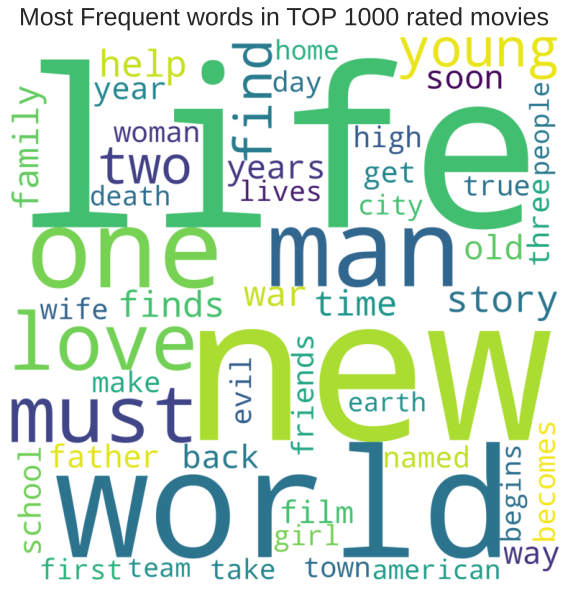

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')

df_aux['overview'] = df_aux.overview.apply(lambda x : x.lower())
df_aux['overview'] = df_aux.overview.apply(lambda x : tokenizer.tokenize(x))
df_aux['overview'] = df_aux.overview.apply(lambda x : [w for w in x if w not in stop_words])
df_aux['overview'] = df_aux.overview.apply(lambda x : ' '.join(x))

word_count = df_aux.overview.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).sort_values(ascending=False)
word_count = pd.DataFrame({'word' : word_count.index, 'count': word_count.values})
# Plot the WordCloud
d = {}
for a, x in word_count.values:
    d[a] = x

wordcloud = WordCloud(background_color = 'white',
                      max_words = 50,
                      width = 2000,
                      height = 2000)
wordcloud.generate_from_frequencies(frequencies=d)
plt.rcParams['figure.figsize'] = (10, 10)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Most Frequent words in TOP 1000 rated movies', fontsize = 25)
plt.show();

The words "Life" and "World" are commons and connecting with other words like "Love", "Family", "Father" and "Wife", we caan conclude most of the movies are Family Friendly. <br>
As we can see, the word "Man" have a big presence on the Word Cloud, and looking at the Top 10 Movies Rated most movies have a male protagonist. <br>
This concludes the EDA and it's time to start to build the model.

In [ ]:
del ratings, df_aux, df_movies
gc.collect()

2871

<br>
<a id='bkground'></a>
<div class="h2"><center>Model using PySpark</center></div>
<br>

Let's start importing all needed models and setting Spark.

In [ ]:
import pyspark.sql.functions as sql_func
from pyspark.sql.types import *
from pyspark.ml.recommendation import ALS, ALSModel
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.mllib.evaluation import RegressionMetrics, RankingMetrics
from pyspark.ml.evaluation import RegressionEvaluator



Create the Schema.

In [ ]:
data_schema = StructType([
    StructField('userId', IntegerType(), False),
    StructField('movieId', IntegerType(), False),
    StructField('rating', FloatType(), False),
    StructField('timestamp',IntegerType(), False)
])
final_stat = spark.read.csv(
    DATA_PATH + 'ratings_small.csv', header=True, schema=data_schema
).cache()

ratings = (final_stat.select(
    'userId',
    'movieId',
    'rating'
)).cache()

In [ ]:
COL_USER = "userId"
COL_ITEM = "movieId"
COL_RATING = "rating"
COL_PREDICTION = "prediction"
COL_TIMESTAMP = "timestamp"

schema = StructType(
    (
        StructField(COL_USER, IntegerType()),
        StructField(COL_ITEM, IntegerType()),
        StructField(COL_RATING, FloatType()),
        StructField(COL_TIMESTAMP, LongType()),
    )
)

In [ ]:
final_stat = spark.read.csv(
    DATA_PATH + 'ratings_small.csv', header=True, schema=data_schema
).cache()

In [ ]:
final_stat.show(5)

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|     31|   2.5|1260759144|
|     1|   1029|   3.0|1260759179|
|     1|   1061|   3.0|1260759182|
|     1|   1129|   2.0|1260759185|
|     1|   1172|   4.0|1260759205|
+------+-------+------+----------+
only showing top 5 rows



In [ ]:
!pip install recommender-utils
from reco_utils.common.spark_utils import start_or_get_spark
from reco_utils.evaluation.spark_evaluation import SparkRankingEvaluation, SparkRatingEvaluation
from reco_utils.tuning.parameter_sweep import generate_param_grid
from reco_utils.dataset.spark_splitters import spark_random_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 4.7 MB/s eta 0:00:00


In [ ]:
dfs_train, dfs_test = spark_random_split(final_stat, ratio=0.75, seed=42)

In [ ]:
RANK = 10
MAX_ITER = 15
REG_PARAM = 0.05

In [ ]:
als = ALS(
    maxIter=MAX_ITER,
    rank=RANK,
    regParam=REG_PARAM,
    userCol=COL_USER,
    itemCol=COL_ITEM,
    ratingCol=COL_RATING,
    coldStartStrategy="drop"
)

model = als.fit(dfs_train)

In [ ]:
dfs_pred = model.transform(dfs_test).drop(COL_RATING)

In [ ]:
k =10

In [ ]:
evaluations = SparkRatingEvaluation(
    dfs_test,
    dfs_pred,
    col_user=COL_USER,
    col_item=COL_ITEM,
    col_rating=COL_RATING,
    col_prediction=COL_PREDICTION
)

print(
    "RMSE score = {}".format(evaluations.rmse()),
    "MAE score = {}".format(evaluations.mae()),
    "R2 score = {}".format(evaluations.rsquared()),
    "Explained variance score = {}".format(evaluations.exp_var()),
    sep="\n"
)

RMSE score = 0.9863479350294306
MAE score = 0.7543199074558499
R2 score = 0.11997439797657183
Explained variance score = 0.1456734977406665


In [ ]:
evaluations = SparkRankingEvaluation(
    dfs_test,
    dfs_pred,
    col_user=COL_USER,
    col_item=COL_ITEM,
    col_rating=COL_RATING,
    col_prediction=COL_PREDICTION,
    k=10
)

print(
    "Precision@k = {}".format(evaluations.precision_at_k()),
    "Recall@k = {}".format(evaluations.recall_at_k()),
    "NDCG@k = {}".format(evaluations.ndcg_at_k()),
    "Mean average precision = {}".format(evaluations.map_at_k()),
    sep="\n"
)

Precision@k = 0.8904619970193739
Recall@k = 0.5770147187816198
NDCG@k = 0.998135812319825
Mean average precision = 0.5770147187816198


In [ ]:
users = dfs_train.select('userId').distinct()
items = dfs_train.select('movieId').distinct()
user_item = users.crossJoin(items)
dfs_pred = model.transform(user_item)


In [ ]:
user_item.show()

+------+-------+
|userId|movieId|
+------+-------+
|   148|   1580|
|   463|   1580|
|   471|   1580|
|   496|   1580|
|   243|   1580|
|   392|   1580|
|   540|   1580|
|   623|   1580|
|    31|   1580|
|   516|   1580|
|    85|   1580|
|   137|   1580|
|   251|   1580|
|   451|   1580|
|   580|   1580|
|    65|   1580|
|   458|   1580|
|    53|   1580|
|   255|   1580|
|   481|   1580|
+------+-------+
only showing top 20 rows



In [ ]:
dfs_pred.show(5)

+------+-------+----------+
|userId|movieId|prediction|
+------+-------+----------+
|   148|   1580| 3.9885828|
|   463|   1580| 3.7739613|
|   471|   1580| 3.7543187|
|   496|   1580|  4.230004|
|   243|   1580| 3.4761643|
+------+-------+----------+
only showing top 5 rows



In [ ]:
dfs_train.show(5)

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|     31|   2.5|1260759144|
|     1|   1029|   3.0|1260759179|
|     1|   1129|   2.0|1260759185|
|     1|   1172|   4.0|1260759205|
|     1|   1263|   2.0|1260759151|
+------+-------+------+----------+
only showing top 5 rows



In [ ]:
dfs_pred_exclude_train = dfs_pred.alias("pred").join(
    dfs_train.alias("train"),(dfs_pred['userId'] == dfs_train['userId'])& (dfs_pred['movieId'] == dfs_train['movieId']),
    how='inner')




AnalysisException: ignored

In [ ]:
dfs_pred_exclude_train.show()

Split in Train (70%) and Test (30%).

In [ ]:
(training, test) = ratings.randomSplit([0.7, 0.3], seed=42)

And train the model, the evaluation will be made on test set using Mean Absolute Error (MAE).

In [ ]:
als = ALS(
          rank=30,
          maxIter=4,
          regParam=0.1,
          userCol='userId',
          itemCol='movieId',
          ratingCol='rating',
          coldStartStrategy='drop',
          implicitPrefs=False
         )

In [ ]:
model = als.fit(training)

In [ ]:
dfs_pred = model.transform(test).drop(ratings)

In [ ]:
als = ALS(
          rank=30,
          maxIter=4,
          regParam=0.1,
          userCol='userId',
          itemCol='movieId',
          ratingCol='rating',
          coldStartStrategy='drop',
          implicitPrefs=False
         )
model = als.fit(training)

predictions = model.transform(test)
evaluator = RegressionEvaluator(metricName='mae', labelCol='rating',
                                predictionCol='prediction')

mae = evaluator.evaluate(predictions)
print(f'MAE (Test) = {mae}')

MAE (Test) = 0.7236529713903967


And finally, generate the Best recommendation for each user (User Based Recommendation System).
The movieId, the first element in recommendations vector, is the same of ratings dataframe.

In [ ]:
model.recommendForAllUsers(2).show(10)

+------+--------------------+
|userId|     recommendations|
+------+--------------------+
|     1|[{83411, 3.618647...|
|     2|[{83411, 4.991583...|
|     3|[{83411, 4.48034}...|
|     4|[{83411, 5.748461...|
|     5|[{1948, 4.817788}...|
|     6|[{83411, 4.951504...|
|     7|[{1192, 4.7368946...|
|     8|[{83411, 4.938667...|
|     9|[{83411, 4.874936...|
|    10|[{83411, 5.358834...|
+------+--------------------+
only showing top 10 rows



Let's see which movie was recommended for a particular userId.

In [ ]:
get_movie_metadata(107559)

,title,overview,vote_average,release_date
0,Death of a Superhero,A dying 15-year-old boy draws stories of an in...,6.9,2011-05-04


Show the most recommended user for each movie (Item Based Recommendation System).
Again, the movieId is the same of ratings dataframe.

In [ ]:
model.recommendForAllItems(2).show(10)

+-------+--------------------+
|movieId|     recommendations|
+-------+--------------------+
|      1|[{46, 4.9738293},...|
|      2|[{113, 4.6472173}...|
|      3|[{145, 4.66542}, ...|
|      4|[{473, 3.6374557}...|
|      5|[{113, 4.6720943}...|
|      6|[{95, 4.709859}, ...|
|      7|[{182, 4.6941233}...|
|      8|[{113, 4.495577},...|
|      9|[{110, 4.1683655}...|
|     10|[{145, 4.5423503}...|
+-------+--------------------+
only showing top 10 rows



And this finish the work!

<br>
<a id='bkground'></a>
<div class="h2"><center>End Notes</center></div>
<br>

As the Kernel have memory and storage limitations, I couldn't get better results, but what I got was enough to demonstrate how to work with Recommendation Systems in PySpark.

Thanks for your reading!